In [1]:
import pyspark


In [2]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [3]:
sc = SparkContext()
# on initialize le streaming avec un interval de 60 seconde
ssc = StreamingContext(sc, 60)
sqlContext = SQLContext(sc)

C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
# on recois les tweets par socket tcp
lines = ssc.socketTextStream("127.0.0.1", 5555)


In [5]:

from collections import namedtuple
fields = ("player", "count" )
Tweet = namedtuple( 'Tweet', fields )


# on va conter le nombre de fois les noms des joueurs sont ecris
players = {"bounou", "hakimi", "boufal", "bono"}
( lines
 .flatMap( lambda text: text.split() ) #Splits to a list
  # Checks for if it's the name of a player  
  .filter( lambda word: word.lower().strip().strip('#') in players) 
  .map( lambda word: ( word.lower().strip().strip('#'), 1 ) ) # Lower cases the word and strip it
  .reduceByKey( lambda a, b: a + b ) 
 # Stores in a Tweet Object
  .map( lambda rec: Tweet( rec[0], rec[1] ) )
 # Sorts Them in a dataframe
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
 # Registers to a table.
  .registerTempTable("players") )
)

# ( lines
#  .flatMap( lambda text: text.split() ) #Splits to a list of words
#    # Checks for if it's the name of a player  
#   .filter( lambda word: word.lower().strip().strip('#') in players) 
#   .map( lambda word: ( word.lower().strip().strip('#'), 1 ) ) # Lower cases the word and strip it
#   .reduceByKey( lambda a, b: a + b ) # count
 
#   # print
#   .pprint()
# )


In [6]:
# start streaming and wait couple of minutes to get enought tweets
ssc.start()


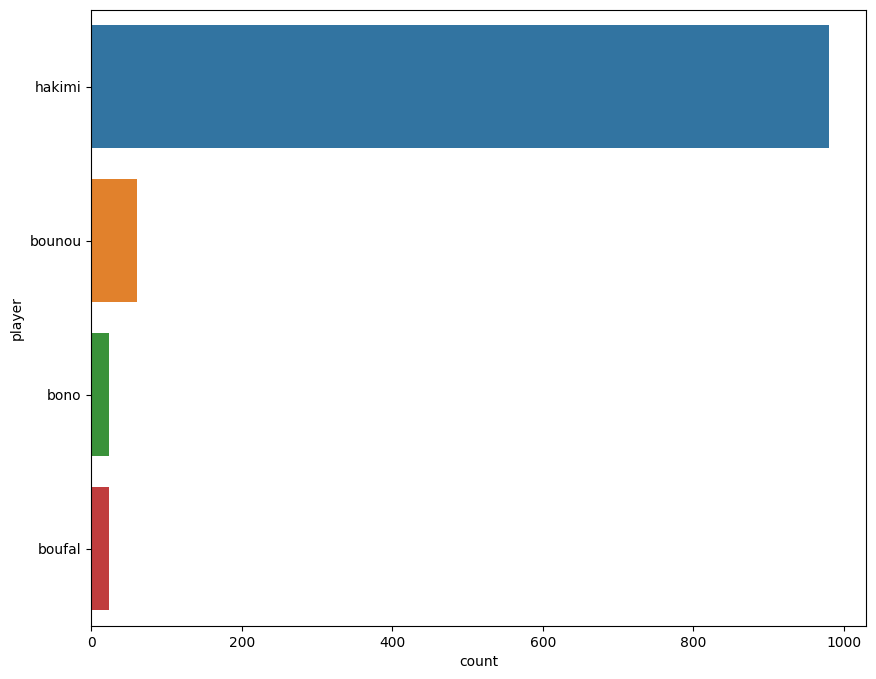

5


Traceback (most recent call last):
  File "C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyspark\serializers.py", line 458, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
  File "C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyspark\cloudpickle\cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyspark\cloudpickle\cloudpickle_fast.py", line 602, in dump
    return Pickler.dump(self, obj)
  File "C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyspark\context.py", line 447, in __getnewargs__
    raise RuntimeError(
RuntimeError: It appears that you are

In [13]:
# import libraries to visualize the results
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
get_ipython().run_line_magic('matplotlib', 'inline')
count = 0
while count < 5:
    
    time.sleep(5)
    players = sqlContext.sql( 'select player, count from players' )
    players_df = players.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="player", data=players_df)
    plt.show()
    count = count + 1
    print(count)

In [12]:

sqlContext.sql('show tables').show()



+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |  players|       true|
+---------+---------+-----------+



In [13]:
# stop streaming and wait couple of minutes to get enought tweets
ssc.stop()
